In [26]:
import pandas as pd
import os
import re

path = "resources/Tablas_elecciones_barrio/"
files = ""
tables = []

    

In [27]:
# Cargar los nombre de todos los archivos almacenados dentro de la carpeta "resources/Tablas_elecciones_barrio/"
for r, d, f in os.walk(path):
    files = f
# lectura y limpieza de las 21 tablas. Resultado: una lista de 21 tablas
for file in files:
    tmp_table = pd.read_excel(path + '{0}'.format(file),  #bloque limpieza
                              sep=";", encoding="ISO-8859-1")
    tmp_table.columns = [i.strip().replace(' ','_') for i in tmp_table.columns]
    tmp_table['Distrito'] = re.sub(" ", "", re.sub("^[0-9]+(\.)(\s)", "", tmp_table.Barrio[0].upper()))
#     print(re.sub(" ", "",re.sub("^[0-9]+(\.)(\s)", "", tmp_table.Barrio[0].upper())))
    tmp_table.drop([0,1], inplace=True) 
    for i in range(0, len(tmp_table.Barrio)):
        tmp_table.iloc[i,0] = re.sub("[0-9]+(\.)(\s)", "", str.strip(tmp_table.iloc[i,0].upper()))
    
    tables.append(tmp_table) #fin bloque

# Se concatenan las 21 tablas en una sola
main_table_elecciones = pd.concat(tables, sort=False)

# Se unifica el index para toda la tabla
main_table_elecciones.reset_index(drop=True, inplace=True)    
main_table_elecciones.head(10)


,Barrio,Censo_electoral,Abstención,Votos_nulos,Votos_blancos,Total_votos_a_candidaturas,PACMA,PH,P.S.O.E.,P.P.,...,IU-MpM,MCE,VOX,UPyD,M.I.,P.C.P.E.,CNTG+,PCTE,PCAS-TC-PPCCAL-PACTO,Distrito
0,PALACIO,17.845,5.379,47.0,50.0,12.369,66.0,0.0,1.149,2.309,...,454.000,2.0,724.000,8.0,5.0,4.0,7.0,1.0,3.0,CENTRO
1,EMBAJADORES,31.496,10.829,56.0,94.0,20.517,107.0,6.0,2.073,2.548,...,1.443,4.0,949.000,11.0,12.0,10.0,28.0,6.0,14.0,CENTRO
2,CORTES,7.755,2.466,16.0,27.0,5.246,24.0,2.0,449.000,1.071,...,188.000,1.0,300.000,3.0,1.0,2.0,6.0,3.0,1.0,CENTRO
3,JUSTICIA,12.838,4.225,22.0,37.0,8.554,47.0,1.0,686.000,1.979,...,183.000,2.0,594.000,13.0,4.0,3.0,9.0,0.0,0.0,CENTRO
4,UNIVERSIDAD,23.738,7.683,48.0,56.0,15.951,78.0,3.0,1.428,2.784,...,527.000,2.0,822.000,11.0,4.0,6.0,19.0,5.0,6.0,CENTRO
5,SOL,5.201,1.923,6.0,9.0,3.263,13.0,1.0,284.000,688.000,...,92.000,0.0,236.000,1.0,1.0,2.0,6.0,2.0,1.0,CENTRO
6,IMPERIAL,18.598,4.436,50.0,62.0,14.050,57.0,4.0,1.388,3.235,...,368.000,1.0,1.005,13.0,4.0,6.0,18.0,3.0,9.0,ARGANZUELA
7,ACACIAS,30.449,6.995,68.0,95.0,23.291,89.0,5.0,2.419,5.100,...,667.000,4.0,1.407,19.0,5.0,4.0,18.0,3.0,10.0,ARGANZUELA
8,CHOPERA,15.600,4.729,51.0,51.0,10.769,44.0,3.0,1.406,2.325,...,394.000,0.0,623.000,10.0,3.0,4.0,17.0,2.0,10.0,ARGANZUELA
9,LEGAZPI,14.431,3.252,24.0,57.0,11.098,36.0,2.0,1.053,1.860,...,249.000,2.0,739.000,13.0,10.0,4.0,12.0,5.0,5.0,ARGANZUELA


In [28]:
import pandas as pd


# Cargar la tabla del Padron por barrios
padron = pd.read_excel("resources/padron_barrios.xls")


In [18]:
# Limpieza y organización de la tabla
tmp = []
separador_tabla = 0
for i in range(0, len(padron.Españoles_Hombres)):
    if pd.isna(padron.Españoles_Hombres[i]):
        dis_bar = padron.Edad[i].replace(" ", "").split("/")
        for j in  range(i+1, len(padron.Españoles_Hombres)):
            if pd.isna(padron.Españoles_Hombres[j]):
                tmp.append(padron.iloc[i:j,].copy(deep=True)) #aqui bloque nuevo
                tmp[separador_tabla].drop([i,i+1], inplace=True) 
                tmp[separador_tabla]['Distrito'] = dis_bar[0]
                tmp[separador_tabla]['Barrio'] = dis_bar[1].strip()
                break
        separador_tabla += 1

main_table_padron = pd.concat(tmp)
main_table_padron.Barrio = [str.strip(i) for i in main_table_padron.Barrio]
main_table_padron.reset_index(drop=True, inplace=True)
main_table_padron.head(50)

,Edad,Españoles_Hombres,Españoles_Mujeres,Españoles_Total,Extranjeros_Hombres,Extranjeros_Mujeres,Extranjeros_Total,Total_Hombres,Total_Mujeres,Total,Distrito,Barrio
0,0 - 4,263.0,238.0,501.0,56.0,50.0,106.0,319.0,288.0,607.0,CENTRO,PALACIO
1,5 - 9,235.0,265.0,500.0,43.0,38.0,81.0,278.0,303.0,581.0,CENTRO,PALACIO
2,10 - 14,227.0,238.0,465.0,30.0,38.0,68.0,257.0,276.0,533.0,CENTRO,PALACIO
3,15 - 19,234.0,282.0,516.0,44.0,55.0,99.0,278.0,337.0,615.0,CENTRO,PALACIO
4,20 - 24,323.0,346.0,669.0,161.0,212.0,373.0,484.0,558.0,1042.0,CENTRO,PALACIO
5,25 - 29,627.0,567.0,1194.0,319.0,434.0,753.0,946.0,1001.0,1947.0,CENTRO,PALACIO
6,30 - 34,833.0,729.0,1562.0,309.0,357.0,666.0,1142.0,1086.0,2228.0,CENTRO,PALACIO
7,35 - 39,850.0,759.0,1609.0,327.0,298.0,625.0,1177.0,1057.0,2234.0,CENTRO,PALACIO
8,40 - 44,1002.0,826.0,1828.0,236.0,171.0,407.0,1238.0,997.0,2235.0,CENTRO,PALACIO
9,45 - 49,931.0,772.0,1703.0,198.0,116.0,314.0,1129.0,888.0,2017.0,CENTRO,PALACIO


In [29]:
# intersección de tablas por la columna Distrito y Barrio
work_table = main_table_elecciones.merge(main_table_padron, on=["Distrito", "Barrio"])
# work_table.head(10)
work_table.columns

Index(['Barrio', 'Censo_electoral', 'Abstención', 'Votos_nulos',
       'Votos_blancos', 'Total_votos_a_candidaturas', 'PACMA', 'PH',
       'P.S.O.E.', 'P.P.', 'FE_de_las_JONS', 'ULEG', 'Cs', 'P-LIB', 'PUM+J',
       'MAS_MADRID', 'IU-MpM', 'MCE', 'VOX', 'UPyD', 'M.I.', 'P.C.P.E.',
       'CNTG+', 'PCTE', 'PCAS-TC-PPCCAL-PACTO', 'Distrito', 'Edad',
       'Españoles_Hombres', 'Españoles_Mujeres', 'Españoles_Total',
       'Extranjeros_Hombres', 'Extranjeros_Mujeres', 'Extranjeros_Total',
       'Total_Hombres', 'Total_Mujeres', 'Total'],
      dtype='object')

## ANÁLISIS DE VOTOS EN BLANCO Y NULOS POR DISTRITOS

In [30]:
#Función para seleccionar columnas de la tabla principal
def seleccionar_columna(partido):
    temp = work_table.groupby(['Distrito', 'Barrio']).agg({partido: 'max'}).reset_index()
    #temp = temp.groupby(['Distrito']).agg({partido: 'sum'}).reset_index()
    return temp
#Esta función solo selecciona una columna, por lo que necesito hacer dos variables

# Numero de votos nulos por distrito y censo electoral
nulos_ = seleccionar_columna('Votos_nulos')
censo_ = seleccionar_columna('Censo_electoral')
#Uno los datos mediante merge
union_todos = censo.merge(nulos, on = ["Distrito"])
union_todos

,Distrito,Censo_electoral,Votos_nulos
0,ARGANZUELA,940.049,234.0
1,BARAJAS,1.244,3.0
2,CARABANCHEL,91.505,262.0
3,CENTRO,98.873,195.0
4,CHAMARTIN,67.564,123.0
5,CHAMBERI,88.913,164.0
6,CIUDADLINEAL,76.864,192.0
7,FUENCARRAL-ELPARDO,103.452,204.0
8,HORTALEZA,85.214,175.0
9,LATINA,89.246,276.0


In [31]:
#Función para seleccionar columnas de la tabla principal
def seleccionar_columna(partido):
    temp = work_table.groupby(['Distrito', 'Barrio']).agg({partido: 'max'}).reset_index()
    temp = temp.groupby(['Distrito']).agg({partido: 'sum'}).reset_index()
    return temp
#Esta función solo selecciona una columna, por lo que necesito hacer dos variables

# Numero de votos nulos por distrito y censo electoral
nulos = seleccionar_columna('Votos_nulos')
censo = seleccionar_columna('Censo_electoral')
#Uno los datos mediante merge
union = censo.merge(nulos, on = ["Distrito"])
union

,Distrito,Censo_electoral,Votos_nulos
0,ARGANZUELA,940.049,234.0
1,BARAJAS,1.244,3.0
2,CARABANCHEL,91.505,262.0
3,CENTRO,98.873,195.0
4,CHAMARTIN,67.564,123.0
5,CHAMBERI,88.913,164.0
6,CIUDADLINEAL,76.864,192.0
7,FUENCARRAL-ELPARDO,103.452,204.0
8,HORTALEZA,85.214,175.0
9,LATINA,89.246,276.0


In [32]:
#Creo una nueva columna que sea el porcentaje de votos nulos respecto al censo electoral.
variable = union.Censo_electoral
variable = [str(variables) for variables in variable]
#variable2 =[(re.sub('\.', ',', variables)) for variables in variable]
variable2 =[940049, 1244, 91505, 98873, 67564, 88913, 76864, 103452, 
             85214, 89246, 41895, 47947, 53268, 50949, 96104, 106572, 66811, 58693, 137991, 11910]
#variable2 =[(re.sub(',', '', variables)) for variables in variable]
#print(variable2)
union.Censo_electoral = variable2
union['Porcentaje'] = (union.Votos_nulos/union.Censo_electoral)*100
union

,Distrito,Censo_electoral,Votos_nulos,Porcentaje
0,ARGANZUELA,940049,234.0,0.024892
1,BARAJAS,1244,3.0,0.241158
2,CARABANCHEL,91505,262.0,0.286323
3,CENTRO,98873,195.0,0.197223
4,CHAMARTIN,67564,123.0,0.182050
5,CHAMBERI,88913,164.0,0.184450
6,CIUDADLINEAL,76864,192.0,0.249792
7,FUENCARRAL-ELPARDO,103452,204.0,0.197193
8,HORTALEZA,85214,175.0,0.205365
9,LATINA,89246,276.0,0.309258


In [56]:
ordenado = union.sort_values(by=['Porcentaje'])
fila = ordenado[(ordenado.Porcentaje == ordenado.Porcentaje.max())]
fila

,Distrito,Censo_electoral,Votos_nulos,Porcentaje
11,MORATALAZ,47947,150.0,0.312845


### Representamos en una gráfica los votos nulos por distrito. 

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

### Gráfico de barras de los votos nulos por distrito

En este gráfico podemos ver que el mayor número de votos nulos aparece en San Blas - Canillejas. No es un distrito con renta especialmente baja (35000€), aunque no se puede sacar una conclusión válida debido al número tan bajo de votos nulos que existen. Moratalaz es el distrito con mayor porcentaje de votos nulos respecto al censo electoral.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

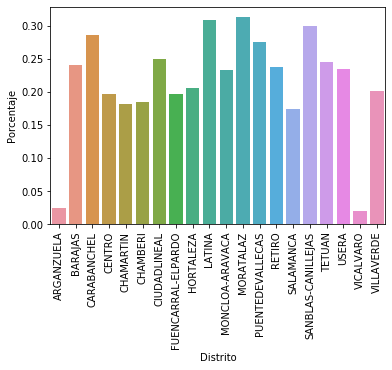

In [60]:
outpct = sns.barplot(x='Distrito', y='Porcentaje', data=union)
plt.xticks(rotation='vertical')

Ahora, vamos a evaluar los votos en blanco según distritos.

In [69]:
#Función para seleccionar columnas de la tabla principal
def seleccionar_columna(partido):
    temp = work_table.groupby(['Distrito', 'Barrio']).agg({partido: 'max'}).reset_index()
    temp = temp.groupby(['Distrito']).agg({partido: 'sum'}).reset_index()
    return temp
#Esta función solo selecciona una columna, por lo que necesito hacer dos variables

# Numero de votos blancos por distrito y censo electoral
blancos = seleccionar_columna('Votos_blancos')
#Uno los datos mediante merge
union1 = censo.merge(blancos, on = ["Distrito"])
union1

,Distrito,Censo_electoral,Votos_blancos
0,ARGANZUELA,940.049,328.0
1,BARAJAS,1.244,0.0
2,CARABANCHEL,91.505,261.0
3,CENTRO,98.873,273.0
4,CHAMARTIN,67.564,228.0
5,CHAMBERI,88.913,278.0
6,CIUDADLINEAL,76.864,226.0
7,FUENCARRAL-ELPARDO,103.452,321.0
8,HORTALEZA,85.214,243.0
9,LATINA,89.246,247.0


In [81]:
#Creo una nueva columna que sea el porcentaje de votos nulos respecto al censo electoral.
varblancos = union.Censo_electoral
varblancos = [str(varblancoss) for varblancoss in varblancos]
variable3 =[(re.sub('\.', ',', variables)) for variables in variable]
variable3
variable3 =[940049,
 1244,
 91505,
 98873,
 67564,
 88913,
 76864,
 103452,
 85214,
 89246,
 41895,
 47947,
 53268,
 50949,
 96104,
 10657,
 66811,
 58693,
 13799,
 11910]
union1.Censo_electoral = variable3
union1['Porcentaje'] = (union1.Votos_blancos/union.Censo_electoral)*100
ordenados = union1.sort_values(by=['Porcentaje'])
filas = ordenados[(ordenados.Porcentaje == ordenados.Porcentaje.max())]
filavoto = ordenados[(ordenados.Votos_blancos == ordenados.Votos_blancos.max())]
print(filavoto)
filas

     Distrito  Censo_electoral  Votos_blancos  Porcentaje
0  ARGANZUELA           940049          328.0    0.034892


,Distrito,Censo_electoral,Votos_blancos,Porcentaje
19,VILLAVERDE,11910,42.0,0.352645


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

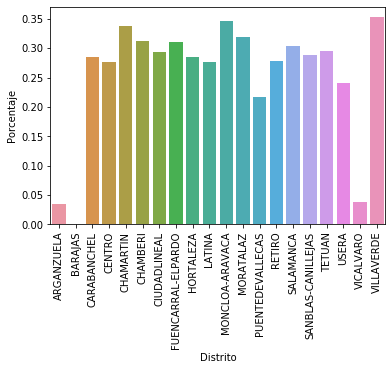

In [82]:
outer = sns.barplot(x='Distrito', y='Porcentaje', data=union1)
plt.xticks(rotation='vertical')

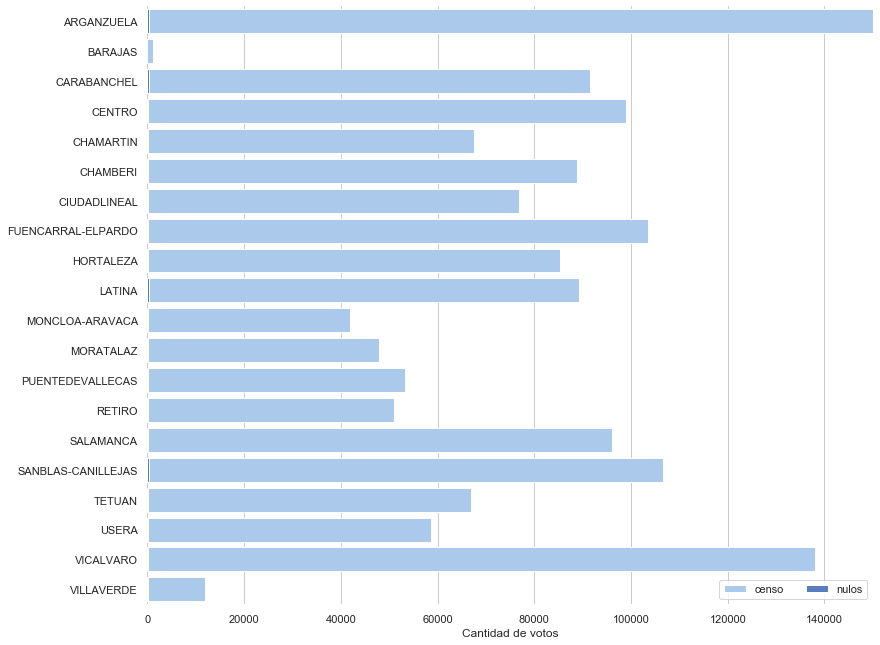

In [88]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(13, 11))
q = sns.barplot(y="Distrito" , x="Censo_electoral", data=union,
            label="censo", color="b")


sns.set_color_codes("muted")
q = sns.barplot(y="Distrito" , x='Votos_nulos', data=union,
            label="nulos",  color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 150000), ylabel="",
       xlabel="Cantidad de votos")
sns.despine(left=True, bottom=True)


Este gráfico no aporta mucho valor, pero sí sirve un poco para ver la poca cantidad de votos nulos que hay. Se ve mejor en la tabla, ya que el número de nulos es prácticamente despreciable comparado con el censo electoral.

In [89]:
#Función para seleccionar columnas de la tabla principal
def seleccionar_columna(partido):
    temp = work_table.groupby(['Distrito', 'Barrio']).agg({partido: 'max'}).reset_index()
    temp = temp.groupby(['Distrito']).agg({partido: 'sum'}).reset_index()
    return temp
#Esta función solo selecciona una columna, por lo que necesito hacer dos variables

# Numero de votos nulos por distrito y censo electoral
abstencion = seleccionar_columna('Abstención')
#Uno los datos mediante merge
abs_censo = censo.merge(abstencion, on = ["Distrito"])
abs_censo

,Distrito,Censo_electoral,Abstención
0,ARGANZUELA,940.049,241.890
1,BARAJAS,1.244,583.000
2,CARABANCHEL,91.505,33.291
3,CENTRO,98.873,32.505
4,CHAMARTIN,67.564,16.690
5,CHAMBERI,88.913,22.788
6,CIUDADLINEAL,76.864,333.701
7,FUENCARRAL-ELPARDO,103.452,554.998
8,HORTALEZA,85.214,21.867
9,LATINA,89.246,28.993


In [108]:
absten = abs_censo.Censo_electoral
list(absten)
absten1 = [940049,
 1244,
 91505,
 98873,
 67564,
 88913,
 76864,
 103452,
 85214,
 89246,
 41895,
 47947,
 53268,
 50949,
 96104,
 106572,
 66811,
 58693,
 13799,
 11910]
abs_censo.Censo_electoral = absten1
abs_censo.Abstención = [241890,
 583,
 33291,
 32505,
 16689,
 22788,
 333701,
 554998,
 21867,
 28993,
 10767,
 13428,
 22049,
 11916,
 25666,
 37356,
 24681,
 25346,
 3531,
 4313]
abs_censo['Porcentaje'] = (abs_censo.Abstención/abs_censo.Censo_electoral)*100

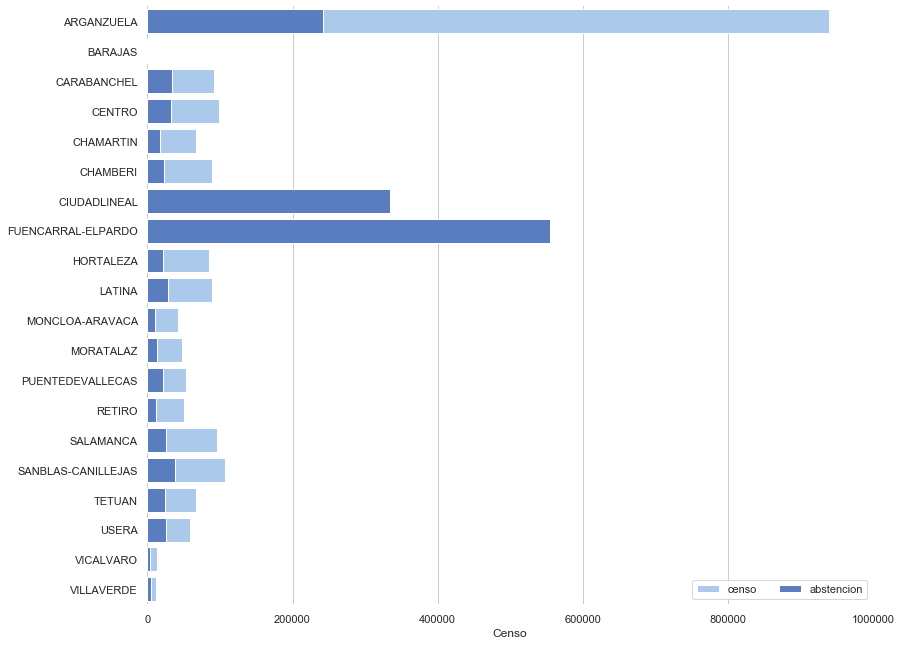

In [110]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(13, 11))
q = sns.barplot(y="Distrito" , x="Censo_electoral", data=abs_censo,
            label="censo", color="b")


sns.set_color_codes("muted")
q = sns.barplot(y="Distrito" , x='Abstención', data=abs_censo,
            label="abstencion",  color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1000000), ylabel="",
       xlabel="Censo")
sns.despine(left=True, bottom=True)

In [ ]:
renta

In [ ]:
renta = pd.read_excel("resources/renta_por_barrios.xlsx", index_col = False)
renta.head(50)
renta1 = renta.rename(columns={'DISTRITO' : 'Distrito', 'RENTA_MEDIA':'renta_media'})
renta1.head(20)
new_tables=[]



In [ ]:
tmp_tabl = []
separador_tabla = 0
tmp = renta1
for i in range(0, len(renta1.Distrito)):
    if pd.isna(renta1.Distrito[i]):
        dis_bar = renta1.Distrito[i+1].replace(" ", "")
        print(dis_bar)
        for j in  range(i+1, len(renta1.Distrito)):
            if pd.isna(renta1.Distrito[j]):
                tmp_tabl.append(renta1.iloc[i:j,].copy(deep=True))
                print(tmp_tabl[separador_tabla])
#                 tmp_table.columns = [i.strip().replace(' ','_') for i in tmp_table.columns]
                tmp_tabl[separador_tabla]['Distrito'] = re.sub("^[0-9]+(\.)(\s)", "", tmp_tabl[separador_tabla]['Distrito'][i+1].upper())
                tmp_tabl[separador_tabla]['Barrio'] = re.sub("^[0-9]+(\.)(\s)", "", tmp_tabl[separador_tabla]['Distrito'][i+2].upper())
                tmp_tabl.drop([0,1], inplace=True)
                for i in range(0, len(renta1.renta_media)):
                    tmp_tabl.iloc[i,0] = re.sub("[0-9]+(\.)(\s)", "", str.strip(tmp_tabl.iloc[i,0].upper()))
                      
                new_tables.append(tmp_tabl) 
                break
        separador_tabla += 1
        
for i in new_tables:
    print(i)

In [ ]:
renta_oficial = pd.concat(new_tables)
renta_oficial.head(48)